En este código implementaremos el método de las potencias o "power method" y el método de potencias inversas con shift o "shifted-inverse power method" para una matriz $A$ de orden $n$ con $n$ valores propios distintos. 

El método de las potencias es capaz de calcular el valor propio dominante $\lambda_1$ y su respectivo vector propio $V_1$ para una matriz $A$ de orden $n$. Se asume que los autovalores tienen la propiedad $\vert \lambda_1\vert>\vert \lambda_2\vert>...>\vert \lambda_n\vert>0.$

Por otro lado, el shifted-inverse power method calcula el valor propio dominante $\lambda_j$ y su vector propio asociado $V_j$. En este caso, se asume que los $n$ valores propios tienen la propiedad $\lambda_1<\lambda_2<...<\lambda_n$ y que $\alpha$ es un real tal que $\vert \lambda_j-\alpha\vert<\vert\lambda_i-\alpha\vert$, para cada $i=1,2,...,j-1,j+1,...,n$. Luego este método es capaz de obtener los valores propios de $A$ siempre que demos un valor de $\alpha$ cerca a uno de ello. La elección de un vector inicial adecuado asegura una convergencia en menos iteraciones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def my_pow(A,x,tol,N, norm):
    """
    Entrada:
    A= una matriz nxn
    x= vector inicial
    tol= tolerancia
    N= maximo numero de iteraciones
    
    Salida:
    lambda= valor propio dominante
    v= vector propio asociado al valor propio dominante
    err= error cometido
    k= numero de iteraciones para alcanzar tol
    """
    lmb = 0. # lambda inicial
    k = 0 # contador de iteraciones
    err = 1. # error inicial (tomar valor grande)
    
    while k<=N and err>tol:
        y = A@x
        # normaliza y
        indx=np.argmax(np.abs(y))
        c1 = y[indx,0]
        dc = np.abs(lmb-c1)# distancia entre lambda^{(k)} y lambda^{(k+1)}
        y = (1/c1)*y
        # actualiza x y lambda (check para convergencia)
        if norm == "norm_2":
            dv = np.linalg.norm(x-y) # distancia entre V^{(k)} y V^{(k+1)}
        elif norm == "infty":
            dv = np.max(abs(x-y))
        err = np.max([dc,dv]) # se toma el maximo de los errores
        x = y
        lmb=c1
        k+=1
        print(lmb,x.T, k) # comentar para no imprimir iteraciones
    v=x
    
    return lmb,v,err,k

In [15]:
A = np.array([[4,2,1], [0,3,2], [1,1,4]])
x_0 = np.array([[1], [2], [1]])
tol = 1e-5
N = 10
norm = "infty"

In [16]:
my_pow(A,x_0,tol,N, norm)

9 [[1.         0.88888889 0.77777778]] 1
6.555555555555555 [[1.         0.6440678  0.76271186]] 2
6.0508474576271185 [[1.         0.57142857 0.77591036]] 3
5.9187675070028005 [[1.         0.55182205 0.78987222]] 4
5.893516327496451 [[1.         0.54894403 0.79940577]] 5
5.897293824781176 [[1.         0.55036152 0.80487207]] 6
5.905595119759256 [[1.         0.55215921 0.80768317]] 7
5.912001586346354 [[1.         0.55342407 0.80901397]] 8
5.915862109849257 [[1.         0.55415425 0.80959966]] 9
5.917908169376919 [[1.         0.55453075 0.80983901]] 10
5.918900521508916 [[1.         0.55470949 0.8099286 ]] 11


(5.918900521508916,
 array([[1.        ],
        [0.55470949],
        [0.8099286 ]]),
 0.0009923521319965545,
 11)

In [18]:
np.linalg.norm(np.array([1, 0.55470949,0.8099286 ]))

1.4013161511215162

In [17]:
np.linalg.norm(np.array([1, 0.55453075, 0.80983901]))

1.401193625025943

In [40]:
def my_invpow(A,x,alpha,tol,N, norm):
    """
    Entrada:
    A= una matriz nxn
    x= vector inicial
    alpha= parametro inicial (preferiblemente cerca al vp requerido)
    tol= tolerancia
    N= maximo numero de iteraciones
    
    Salida:
    lambda= valor propio
    v= vector propio asociado al valor propio dominante
    err= error cometido
    k= numero de iteraciones para alcanzar tol
    """
    mu = 0. # mu inicial
    lmb= 0. # lambda inicial
    k = 0 # contador de iteraciones
    err = 1. # error inicial (tomar valor grande)
    n=np.shape(A)[0]  # tamaño de A
    
    # definimos la matriz A - alpha*I
    A=A-alpha*np.eye(n)
    
    while k<=N and err>tol:
        y = np.linalg.solve(A,x) # esto calcula (A-alpha*I)^{-1}x
        # normaliza y
        indx=np.argmax(np.abs(y))
        c1 = y[indx,0] # esto es mu
        dc = np.abs(mu-c1)# error entre lambda^{(k)} y lambda^{(k+1)}
        y = (1/c1)*y
        # actualiza x and lambda (check para convergencia)
        if norm == "norm_2":
            dv = np.linalg.norm(x-y) # distancia entre V^{(k)} y V^{(k+1)}
        elif norm == "infty":
            dv = np.max(abs(x-y))
        err = np.max([dc,dv]) # se toma el maximo de los errores
        x = y
        mu=c1
        k+=1
        lmb=alpha+1/c1
        #print(mu,' ', lmb,x.T, k) # comentar para no imprimir iteraciones
    v=x
    return lmb,v,err,k

In [41]:
np.linalg.eig(A)

(array([5.91963957+0.j        , 2.54018022+0.68817282j,
        2.54018022-0.68817282j]),
 array([[-0.71357865+0.j        ,  0.71828869+0.j        ,
          0.71828869-0.j        ],
        [-0.39592057+0.j        , -0.51850636+0.38004717j,
         -0.51850636-0.38004717j],
        [-0.57797268+0.j        , -0.01155933-0.26578759j,
         -0.01155933+0.26578759j]]))

In [54]:
p = 5
np.linalg.norm(my_invpow(A,x_0,p,tol,N, norm)[1]), my_invpow(A,x_0,p,tol,N, norm)[3]

(1.4013935810900244, 11)

In [74]:
A

array([[0.8, 0.3],
       [0.2, 0.7]])

In [75]:
A = np.array([[0.8, 0.3], [0.2, 0.7]])
v = np.linalg.eig(A)[1]
((v/v[1,0])[:, 0]).reshape((2,1))

array([[1.5],
       [1. ]])

In [77]:
1.5*50000/2.5

30000.0

In [5]:
# definamos una matriz y un vector inicial
A = np.array([[0,11,-5],
              [-2,17,-7],
              [-4,26,-10]])

x0 = np.array([[1],[1],[1]])

### veamos sus autovalores usando Numpy

eigval,eigvec=np.linalg.eig(A)
print("los autovalores son ",eigval)
print("los autovectores son (leer por columnas)\n",eigvec)

print("")
indx=np.argmax(np.abs(eigval)) # indice de lambda dominante
dom_lmb=eigval[indx] # valor propio dominante
print("el autovalor dominante es ", dom_lmb)

dom_eigvec = eigvec[:,indx] # vector propio asociado a lambda dominante
indx_vec = np.argmax(np.abs(dom_eigvec)) # indice del mayor v_i en V
norm_eigvec=1/dom_eigvec[indx_vec]*eigvec[:,indx] # vector propio normalizado
print("y su autovector asociado (normalizado) es ",norm_eigvec)

los autovalores son  [1. 2. 4.]
los autovectores son (leer por columnas)
 [[ 0.40824829 -0.21821789 -0.32444284]
 [ 0.40824829 -0.43643578 -0.48666426]
 [ 0.81649658 -0.87287156 -0.81110711]]

el autovalor dominante es  4.000000000000021
y su autovector asociado (normalizado) es  [0.4 0.6 1. ]


In [6]:
# probemos nuestra implementacion de pow

lmb,v,error,k = my_pow(A,x0,1E-5,100)
print("\niteraciones usadas ",k)
print("error ",error)

12 [[0.5        0.66666667 1.        ]]
5.333333333333332 [[0.4375 0.625  1.    ]]
4.5 [[0.41666667 0.61111111 1.        ]]
4.222222222222221 [[0.40789474 0.60526316 1.        ]]
4.105263157894727 [[0.40384615 0.6025641  1.        ]]
4.0512820512820475 [[0.40189873 0.60126582 1.        ]]
4.025316455696197 [[0.4009434  0.60062893 1.        ]]
4.012578616352204 [[0.40047022 0.60031348 1.        ]]
4.006269592476485 [[0.40023474 0.60015649 1.        ]]
4.00312989045384 [[0.40011728 0.60007819 1.        ]]
4.001563721657538 [[0.40005862 0.60003908 1.        ]]
4.000781555295044 [[0.4000293  0.60001954 1.        ]]
4.000390701308849 [[0.40001465 0.60000977 1.        ]]
4.000195331575345 [[0.40000732 0.60000488 1.        ]]
4.0000976610186 [[0.40000366 0.60000244 1.        ]]
4.000048829317118 [[0.40000183 0.60000122 1.        ]]
4.000024414360526 [[0.40000092 0.60000061 1.        ]]
4.000012207105749 [[0.40000046 0.60000031 1.        ]]
4.000006103534247 [[0.40000023 0.60000015 1.        ]

In [12]:
# probemos nuestra implementacion de invpow
x0 = np.array([[1],[1],[1]])
lmb,v,error,k = my_invpow(A,x0,3.9,1E-5,100)
print("\niteraciones usadas ",k)
print("error ",error)

52.105263157894875   3.919191919191919 [[0.39393939 0.5959596  1.        ]]
9.57469431153645   4.004441976679622 [[0.40033315 0.6002221  1.        ]]
10.023378824629626   3.99976675704831 [[0.39998251 0.59998834 1.        ]]
9.998772405517455   4.000012277451998 [[0.40000092 0.60000061 1.        ]]
10.000064618168468   3.9999993538224907 [[0.39999995 0.59999997 1.        ]]
9.999996599065788   4.0000000340093536 [[0.4 0.6 1. ]]
10.00000017899663   3.9999999982100336 [[0.4 0.6 1. ]]

iteraciones usadas  7
error  3.5799308424344645e-06


In [3]:
import sympy as sp

In [78]:
def fac(n):
    if n == 0:
        return 1
    else:
        return n*fac(n-1)

In [80]:
(fac(5)*10**(-6))**(1/5)

0.16437518295172257

In [99]:
f = lambda x: sp.sin(x) 
x = sp.symbols('x')
f(x)

sin(x)

In [100]:
starts = [0, 1/3, 2/3, 1]
aprox = 0
vals = []
for j in range(len(starts)):
    s = 1
    for k in range(len(starts)):
        if k != j:
            s *= (x-starts[k])/ (starts[j] - starts[k])
    aprox += s*f(starts[j])
    vals.append(s)
aprox.expand()

-3.9308639346934*x**3 + 4.5*x**3*sin(1) - 4.5*x**2*sin(1) + 3.76877577734184*x**2 + 0.162088157351553*x + 1.0*x*sin(1)

In [94]:
9/5

1.8

In [89]:
vals

[(1 - x)*(1 - x/2), x*(2 - x), x*(x - 1)/2]

In [96]:
(0.25**3)*(1.5**1.5)/(9*np.sqrt(3))

0.0018414239093399677

In [101]:
(5*10**(-7)*24/np.sin(1))**(1/4)

0.06145192971351189

In [103]:
h = (6*10**(-9))**(1/3)

In [104]:
5/h

2751.606040745521

In [105]:
M = 11 # entre 1-6

In [106]:
f = lambda x: 2+sp.sin(2*sp.sqrt(x))

In [107]:
h = (6-1)/M

In [109]:
s = 0
x_k = 1 + h
for i in range(M-1):
    f(x_k)
    x_k += h

In [111]:
((h/2)*(f(6)+f(1)) + h*s).evalf()

0.892421588012906

In [116]:
M = 11
h = (6-1)/(2*M)
f = lambda x: 2 - sp.sin(2*sp.sqrt(x))

In [121]:
s_1 = 0
s_2 = 0
x = [1 + h*i for i in range(2*M+1)]
for k in range(1,M):
    s_1 += f(x[2*k])
for k in range(1, M+1):
    s_2 += f(x[2*k-1])
((h/3)*(f(6)+f(1))+2*h*s_1/3 +  4*h*s_2/3).evalf()

11.8165425889845

In [122]:
import pandas as pd

In [171]:
df = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")

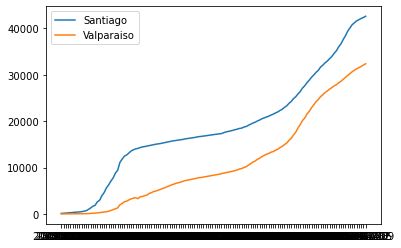

In [182]:
comuna = "Santiago"
fecha = df.query(f'Comuna == "{comuna}"').columns[5:-1]
datos = df.query(f'Comuna == "{comuna}"').values[0][5:-1]
plt.plot(fecha, datos, label = comuna)
comuna = "Valparaiso"
fecha = df.query(f'Comuna == "{comuna}"').columns[5:-1]
datos = df.query(f'Comuna == "{comuna}"').values[0][5:-1]
plt.plot(fecha, datos, label = comuna)
plt.legend()
plt.show()

In [183]:
import sympy as sp

In [184]:
x, y, z = sp.symbols('x y z')

In [211]:
f = x**3*sp.sin(x)
f

x**3*sin(x)

In [212]:
sp.integrate(f, x)

-x**3*cos(x) + 3*x**2*sin(x) + 6*x*cos(x) - 6*sin(x)